In [89]:
import pandas as pd
import numpy as np
import seaborn as sns

In [90]:
file_name = '../data/assignment1.csv'
raw_data = pd.read_csv(file_name)
raw_data.head(3)

shot_outcome shot_pressure  build_up_passes  distance_from_goal  \
0        Point           Low              8.0           14.560220   
1         Wide           Low              4.0           11.180340   
2        Point        Medium              3.0           34.205263   

        Target variable  
0  Free Kick from Hands  
1             Open Play  
2             Open Play

In [91]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   shot_outcome        158 non-null    object 
 1   shot_pressure       154 non-null    object 
 2   build_up_passes     154 non-null    float64
 3   distance_from_goal  149 non-null    float64
 4   Target variable     162 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.5+ KB


In [92]:
raw_data.describe()

build_up_passes  distance_from_goal
count       154.000000          149.000000
mean          6.189292           31.338338
std           5.205257           10.929869
min           0.000000            4.000000
25%           2.000000           22.203603
50%           5.000000           32.756679
75%           9.000000           39.597980
max          29.000000           54.589376

In [93]:
df = raw_data
df.rename( {'Target variable':'target_variable' } , axis=1 , inplace = True)

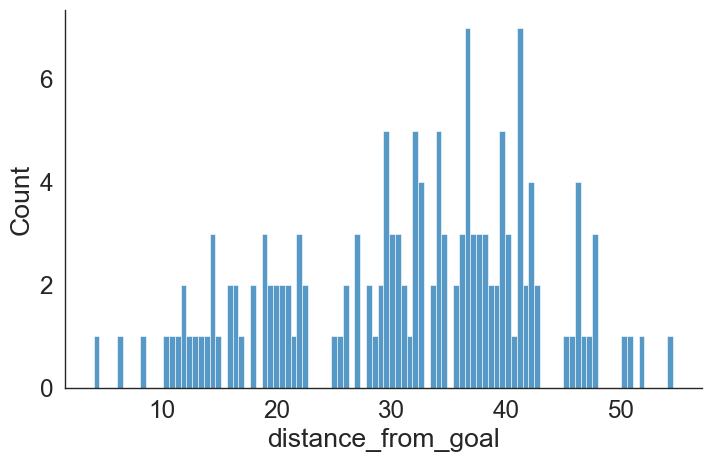

In [94]:
import matplotlib.pyplot as plt
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="distance_from_goal", kind="hist", bins = 100, aspect = 1.50)
plt.show()

The above graph showes that the distribution is skewed to the left. Using mode will be more appropriate here.

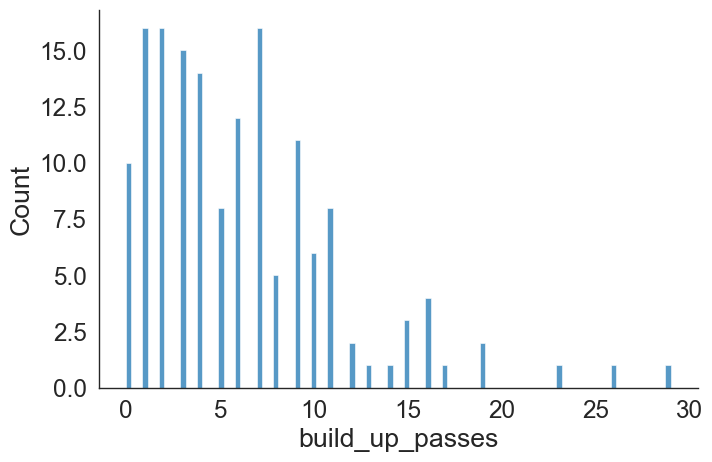

In [95]:
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="build_up_passes", kind="hist", bins = 100, aspect = 1.50)
plt.show()

The above graph showes that the distribution is skewed to the right. Using mode will be more appropriate here.

c:\Users\Sujil Kumar K.M\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


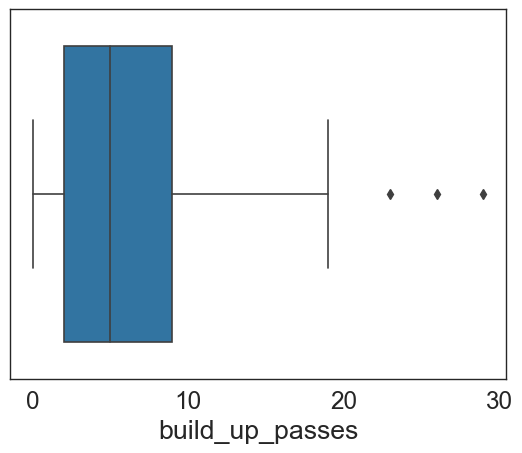

In [96]:
sns.boxplot(df.build_up_passes)
plt.show()

c:\Users\Sujil Kumar K.M\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


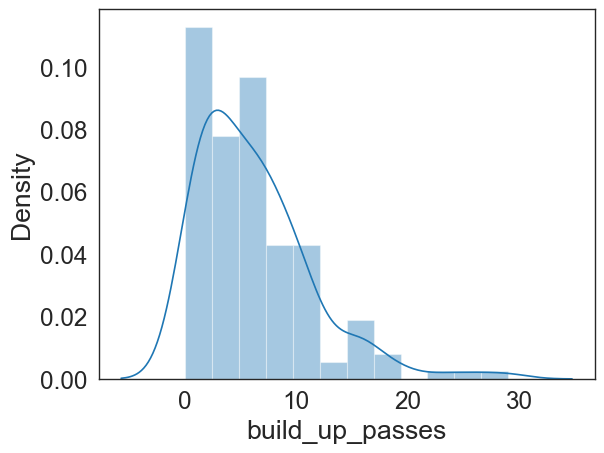

In [97]:
sns.distplot(df.build_up_passes)
plt.show()

c:\Users\Sujil Kumar K.M\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


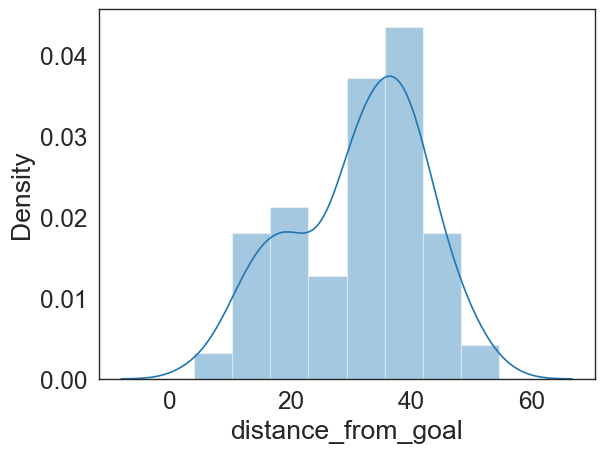

In [98]:
sns.distplot(df.distance_from_goal)
plt.show()

In [99]:
df.isnull().sum()

shot_outcome           4
shot_pressure          8
build_up_passes        8
distance_from_goal    13
target_variable        0
dtype: int64

In [100]:
df.isnull().sum()*100/len(df)

shot_outcome          2.469136
shot_pressure         4.938272
build_up_passes       4.938272
distance_from_goal    8.024691
target_variable       0.000000
dtype: float64

It seems to be good enough for now, meaning no need to drop any columns as they have only less than ten() percent of the data missing in all the columns.

In [101]:
# deleting rows with all mising values
df.dropna(how = 'all')

shot_outcome shot_pressure  build_up_passes  distance_from_goal  \
0          Point           Low              8.0           14.560220   
1           Wide           Low              4.0           11.180340   
2          Point        Medium              3.0           34.205263   
3           Post           Low             16.0                 NaN   
4          Short          High             10.0           32.249031   
..           ...           ...              ...                 ...   
157         Wide           Low              5.0           32.557641   
158         Wide           Low              7.0           45.000000   
159        Point           Low              3.0           39.623226   
160        Short        Medium              9.0                 NaN   
161         Wide           Low              9.0           51.039201   

           target_variable  
0     Free Kick from Hands  
1                Open Play  
2                Open Play  
3                Open Play  
4                Open Play  
..                     ...  
157              Open Play  
158              Open Play  
159              Open Play  
160              Open Play  
161  Free Kick from Ground  

[162 rows x 5 columns]

Records are okay, no need to remove any record with no target variable

In [102]:
df.isnull().sum()

shot_outcome           4
shot_pressure          8
build_up_passes        8
distance_from_goal    13
target_variable        0
dtype: int64

Since the variables are not normally distributed, we need to use median to do imputation

In [103]:
df['build_up_passes'].fillna((df['build_up_passes'].mean()), inplace=True)
df['distance_from_goal'].fillna((df['distance_from_goal'].mean()), inplace=True)

For categorical data we will be using Mode to do imputation

In [104]:
df['shot_outcome'] = df['shot_outcome'].fillna(df['shot_outcome'].mode()[0])
df['shot_pressure'] = df['shot_pressure'].fillna(df['shot_pressure'].mode()[0])

In [105]:
df.isnull().sum()

shot_outcome          0
shot_pressure         0
build_up_passes       0
distance_from_goal    0
target_variable       0
dtype: int64

In [106]:
file_path = '../exported/output.csv'
df.to_csv(file_path, index=False)

In [107]:
new_data = pd.read_csv('../exported/output.csv')
new_data

shot_outcome shot_pressure  build_up_passes  distance_from_goal  \
0          Point           Low              8.0           14.560220   
1           Wide           Low              4.0           11.180340   
2          Point        Medium              3.0           34.205263   
3           Post           Low             16.0           31.338338   
4          Short          High             10.0           32.249031   
..           ...           ...              ...                 ...   
157         Wide           Low              5.0           32.557641   
158         Wide           Low              7.0           45.000000   
159        Point           Low              3.0           39.623226   
160        Short        Medium              9.0           31.338338   
161         Wide           Low              9.0           51.039201   

           target_variable  
0     Free Kick from Hands  
1                Open Play  
2                Open Play  
3                Open Play  
4                Open Play  
..                     ...  
157              Open Play  
158              Open Play  
159              Open Play  
160              Open Play  
161  Free Kick from Ground  

[162 rows x 5 columns]